In [155]:
!pip install hyperopt
!pip install statsmodels

     ---------------------------------------- 9.2/9.2 MB 3.7 MB/s eta 0:00:00
     -------------------------------------- 233.8/233.8 kB 2.9 MB/s eta 0:00:00


In [34]:
import pickle
import numpy as np
from hyperopt import Trials
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import pandas as pd
import statsmodels.api as sm

Each model is stored in a Trials object from the hyperopt library. ChatGPT or the documentation can help you retrieve the information you need.

For each search algorithm, 200 models (hyperparameter combinations) were trained.

In [4]:
# Retrieving the trials
with open("rand_trials_200.bin", "rb") as f:
    rand_trials = pickle.load(f)

with open("tpe_trials_200.bin", "rb") as f:
    tpe_trials = pickle.load(f)

In [5]:
# Getting the best models for each algorithm
rand_best = min(rand_trials, key=lambda t: t['result']['loss'])
tpe_best = min(tpe_trials, key=lambda t: t['result']['loss'])

In [6]:
# Example of information saved in each trial (model):
rand_best

{'state': 2,
 'tid': 53,
 'spec': None,
 'result': {'loss': -0.7136968834339138,
  'status': 'ok',
  'hyperparameters': {'del_num_times': 0.0,
   'dropout': 0.1101374997984408,
   'l2': 6.336724645751509e-06,
   'learning_rate': 0.0003557400109264205,
   'model_size': (32,),
   'synonym_num_times': 1.0},
  'train_losses': [[2.299614171187083,
    2.2982757290204368,
    2.2970434427261353,
    2.2951273918151855,
    2.2932871182759604,
    2.29086971282959,
    2.288474182287852,
    2.2853762110074363,
    2.282190521558126,
    2.2786033948262534,
    2.2747117082277932,
    2.2701634963353476,
    2.265556971232096,
    2.2604082425435386,
    2.2546314001083374,
    2.249835252761841,
    2.243880053361257,
    2.2383588353792825,
    2.2318449219067893,
    2.225856383641561,
    2.2203078269958496,
    2.2134272853533425,
    2.2071948250134787,
    2.201148589452108,
    2.1972922881444297,
    2.1917627453804016,
    2.18590654929479,
    2.179501791795095,
    2.1772693792978

Text(0.5, 1.0, 'Loss of Best Random Search Model Over Time')

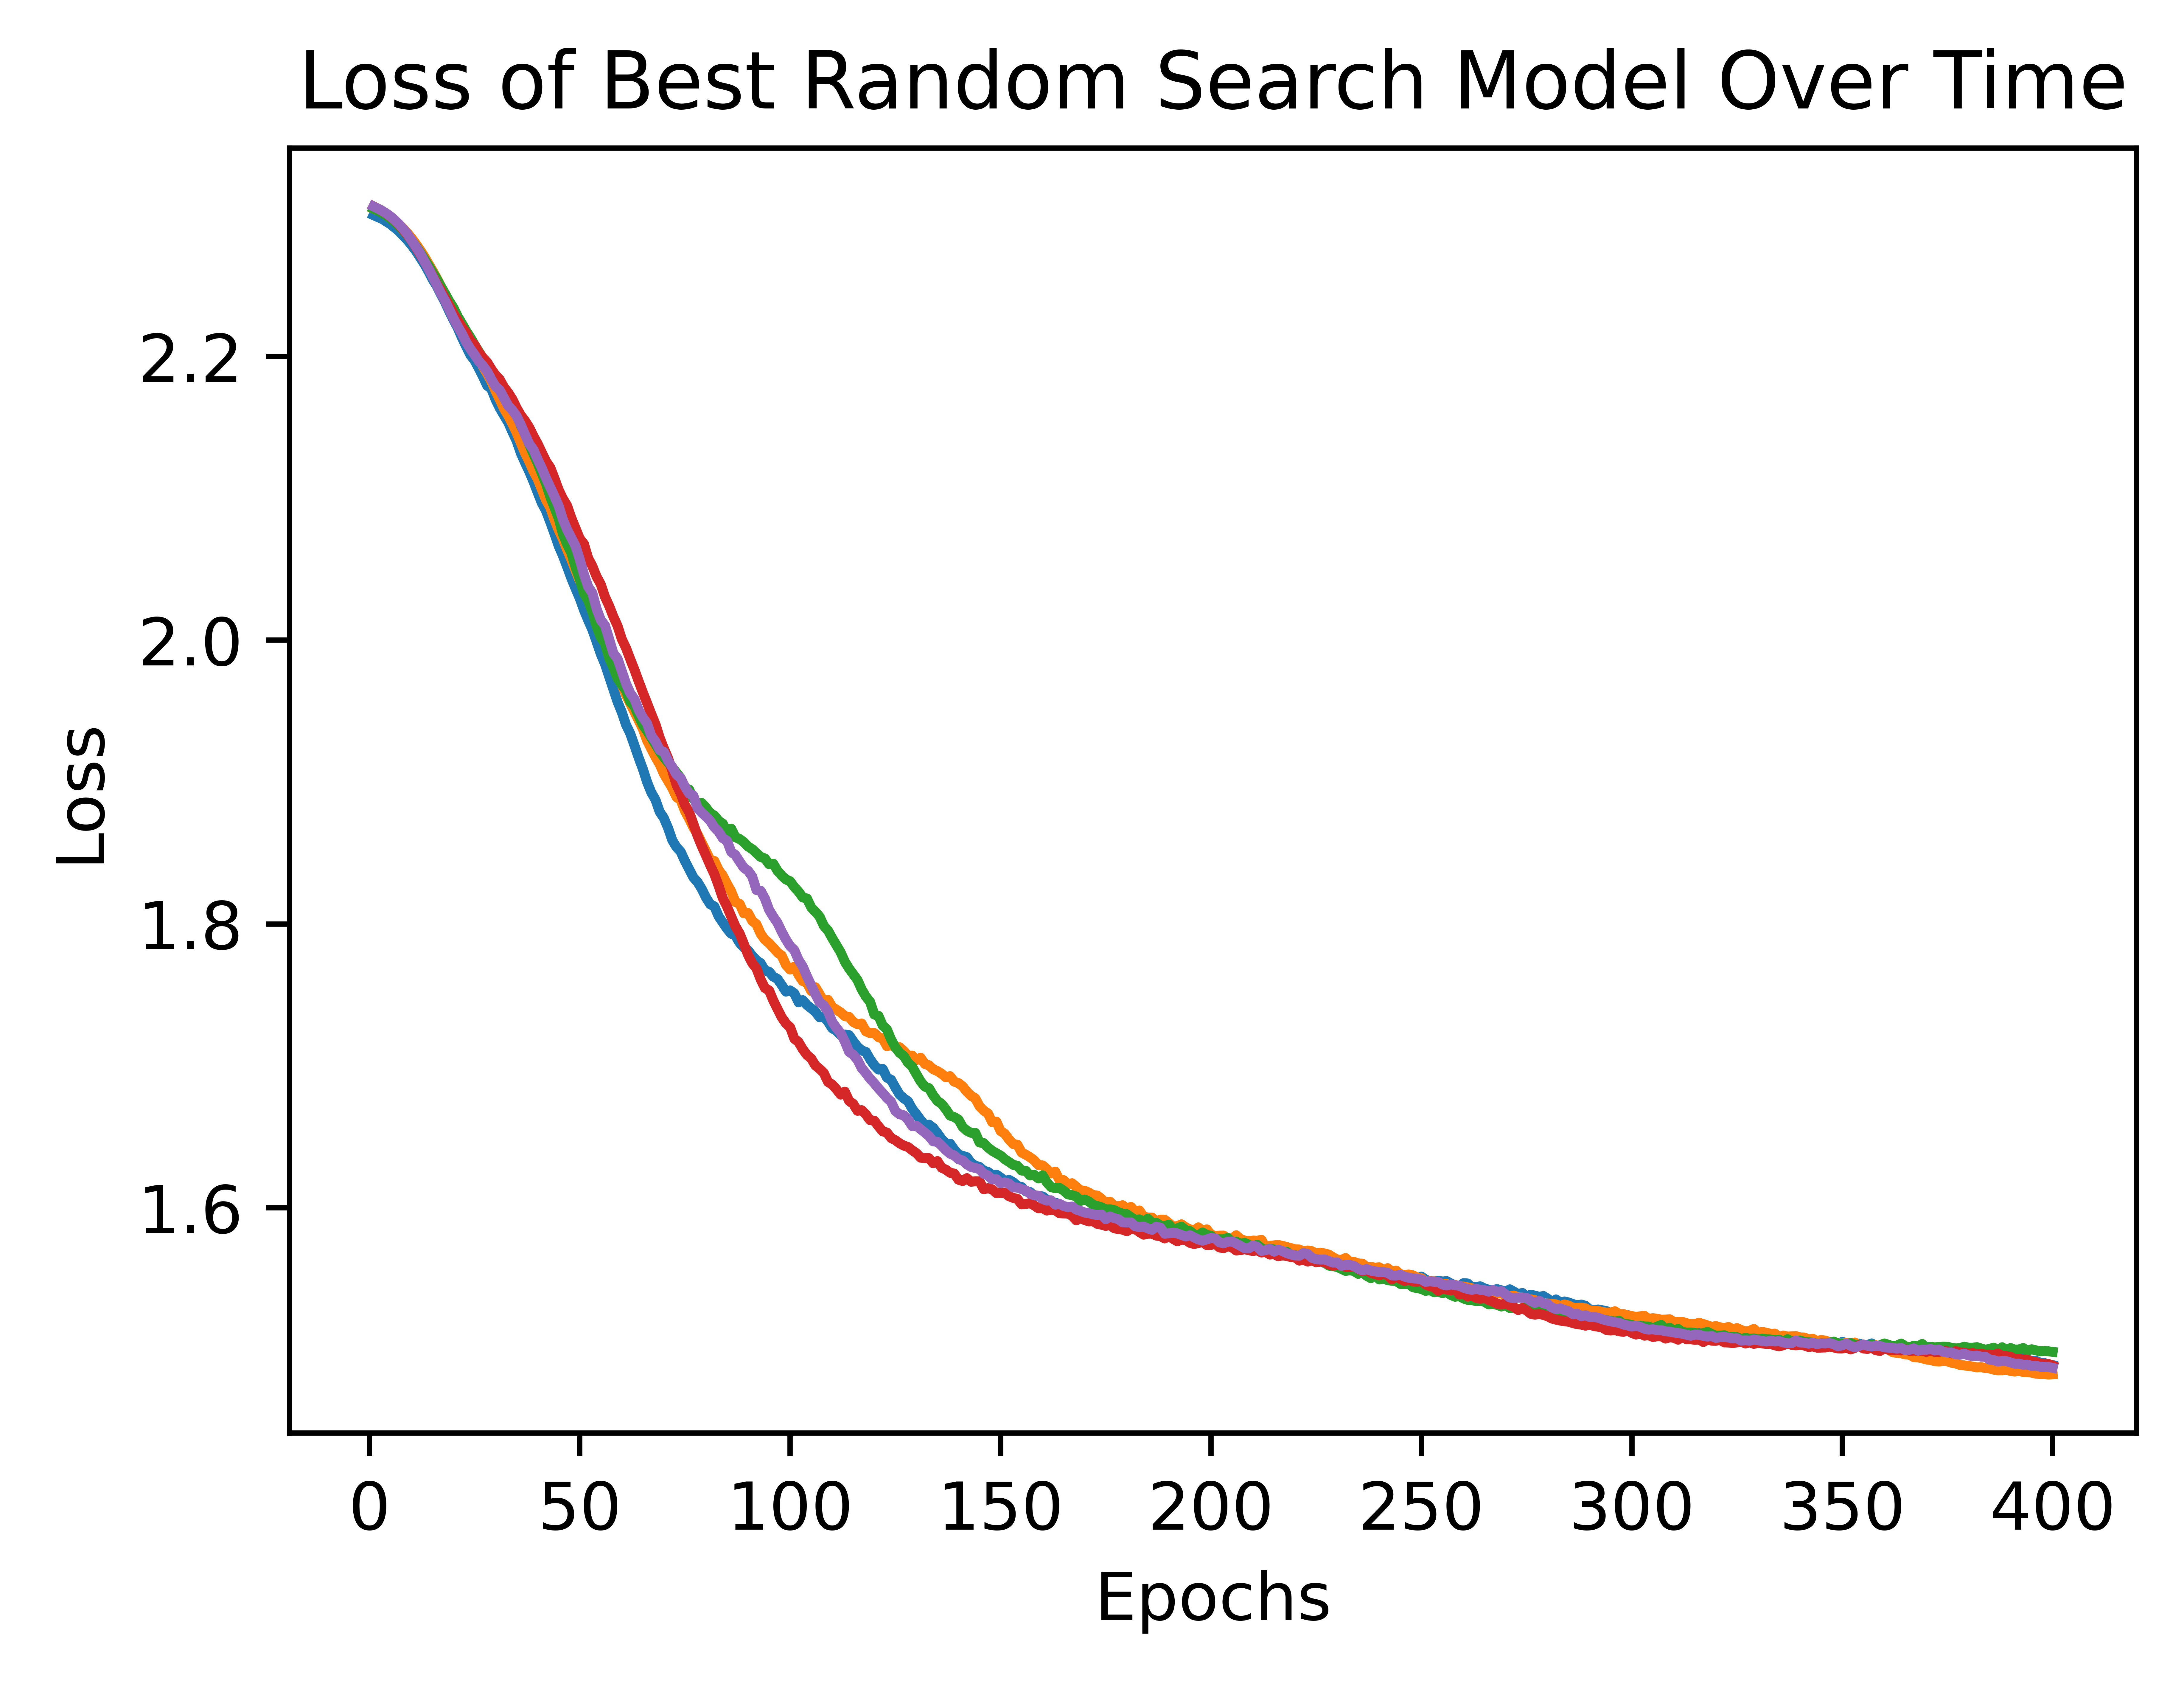

In [95]:
plt.figure(figsize=(5, 3.5), dpi=1600)

for i in range(len(rand_best['result']['train_losses'])):
    loss_values = rand_best['result']['train_losses'][i]
    time_steps = range(1, len(loss_values) + 1)
    plt.plot(time_steps, loss_values)

# Set the x-axis label
plt.xlabel('Epochs')
# Set the y-axis label
plt.ylabel('Loss')
# Set the title of the plot
plt.title('Loss of Best Random Search Model Over Time')

In [10]:
tpe_best

{'state': 2,
 'tid': 93,
 'spec': None,
 'result': {'loss': -0.7180173221722981,
  'status': 'ok',
  'hyperparameters': {'del_num_times': 0.0,
   'dropout': 0.3154875519178951,
   'l2': 5.772855766644525e-06,
   'learning_rate': 0.00032449781569679487,
   'model_size': (128,),
   'synonym_num_times': 1.0},
  'train_losses': [[2.3016152580579123,
    2.299156884352366,
    2.296122908592224,
    2.292286733786265,
    2.287558098634084,
    2.281850298245748,
    2.274857501188914,
    2.2672192454338074,
    2.258473833401998,
    2.249050716559092,
    2.2382845878601074,
    2.2294141252835593,
    2.21957798798879,
    2.2089667518933616,
    2.2006256779034934,
    2.1940972208976746,
    2.1848426262537637,
    2.1781660318374634,
    2.168685257434845,
    2.1584903796513877,
    2.1503511667251587,
    2.1403414607048035,
    2.131677528222402,
    2.119771718978882,
    2.10862265030543,
    2.0972084999084473,
    2.0886638164520264,
    2.073906640211741,
    2.06166007121404

Text(0.5, 1.0, 'Loss of Best TPE Search Model Over Time')

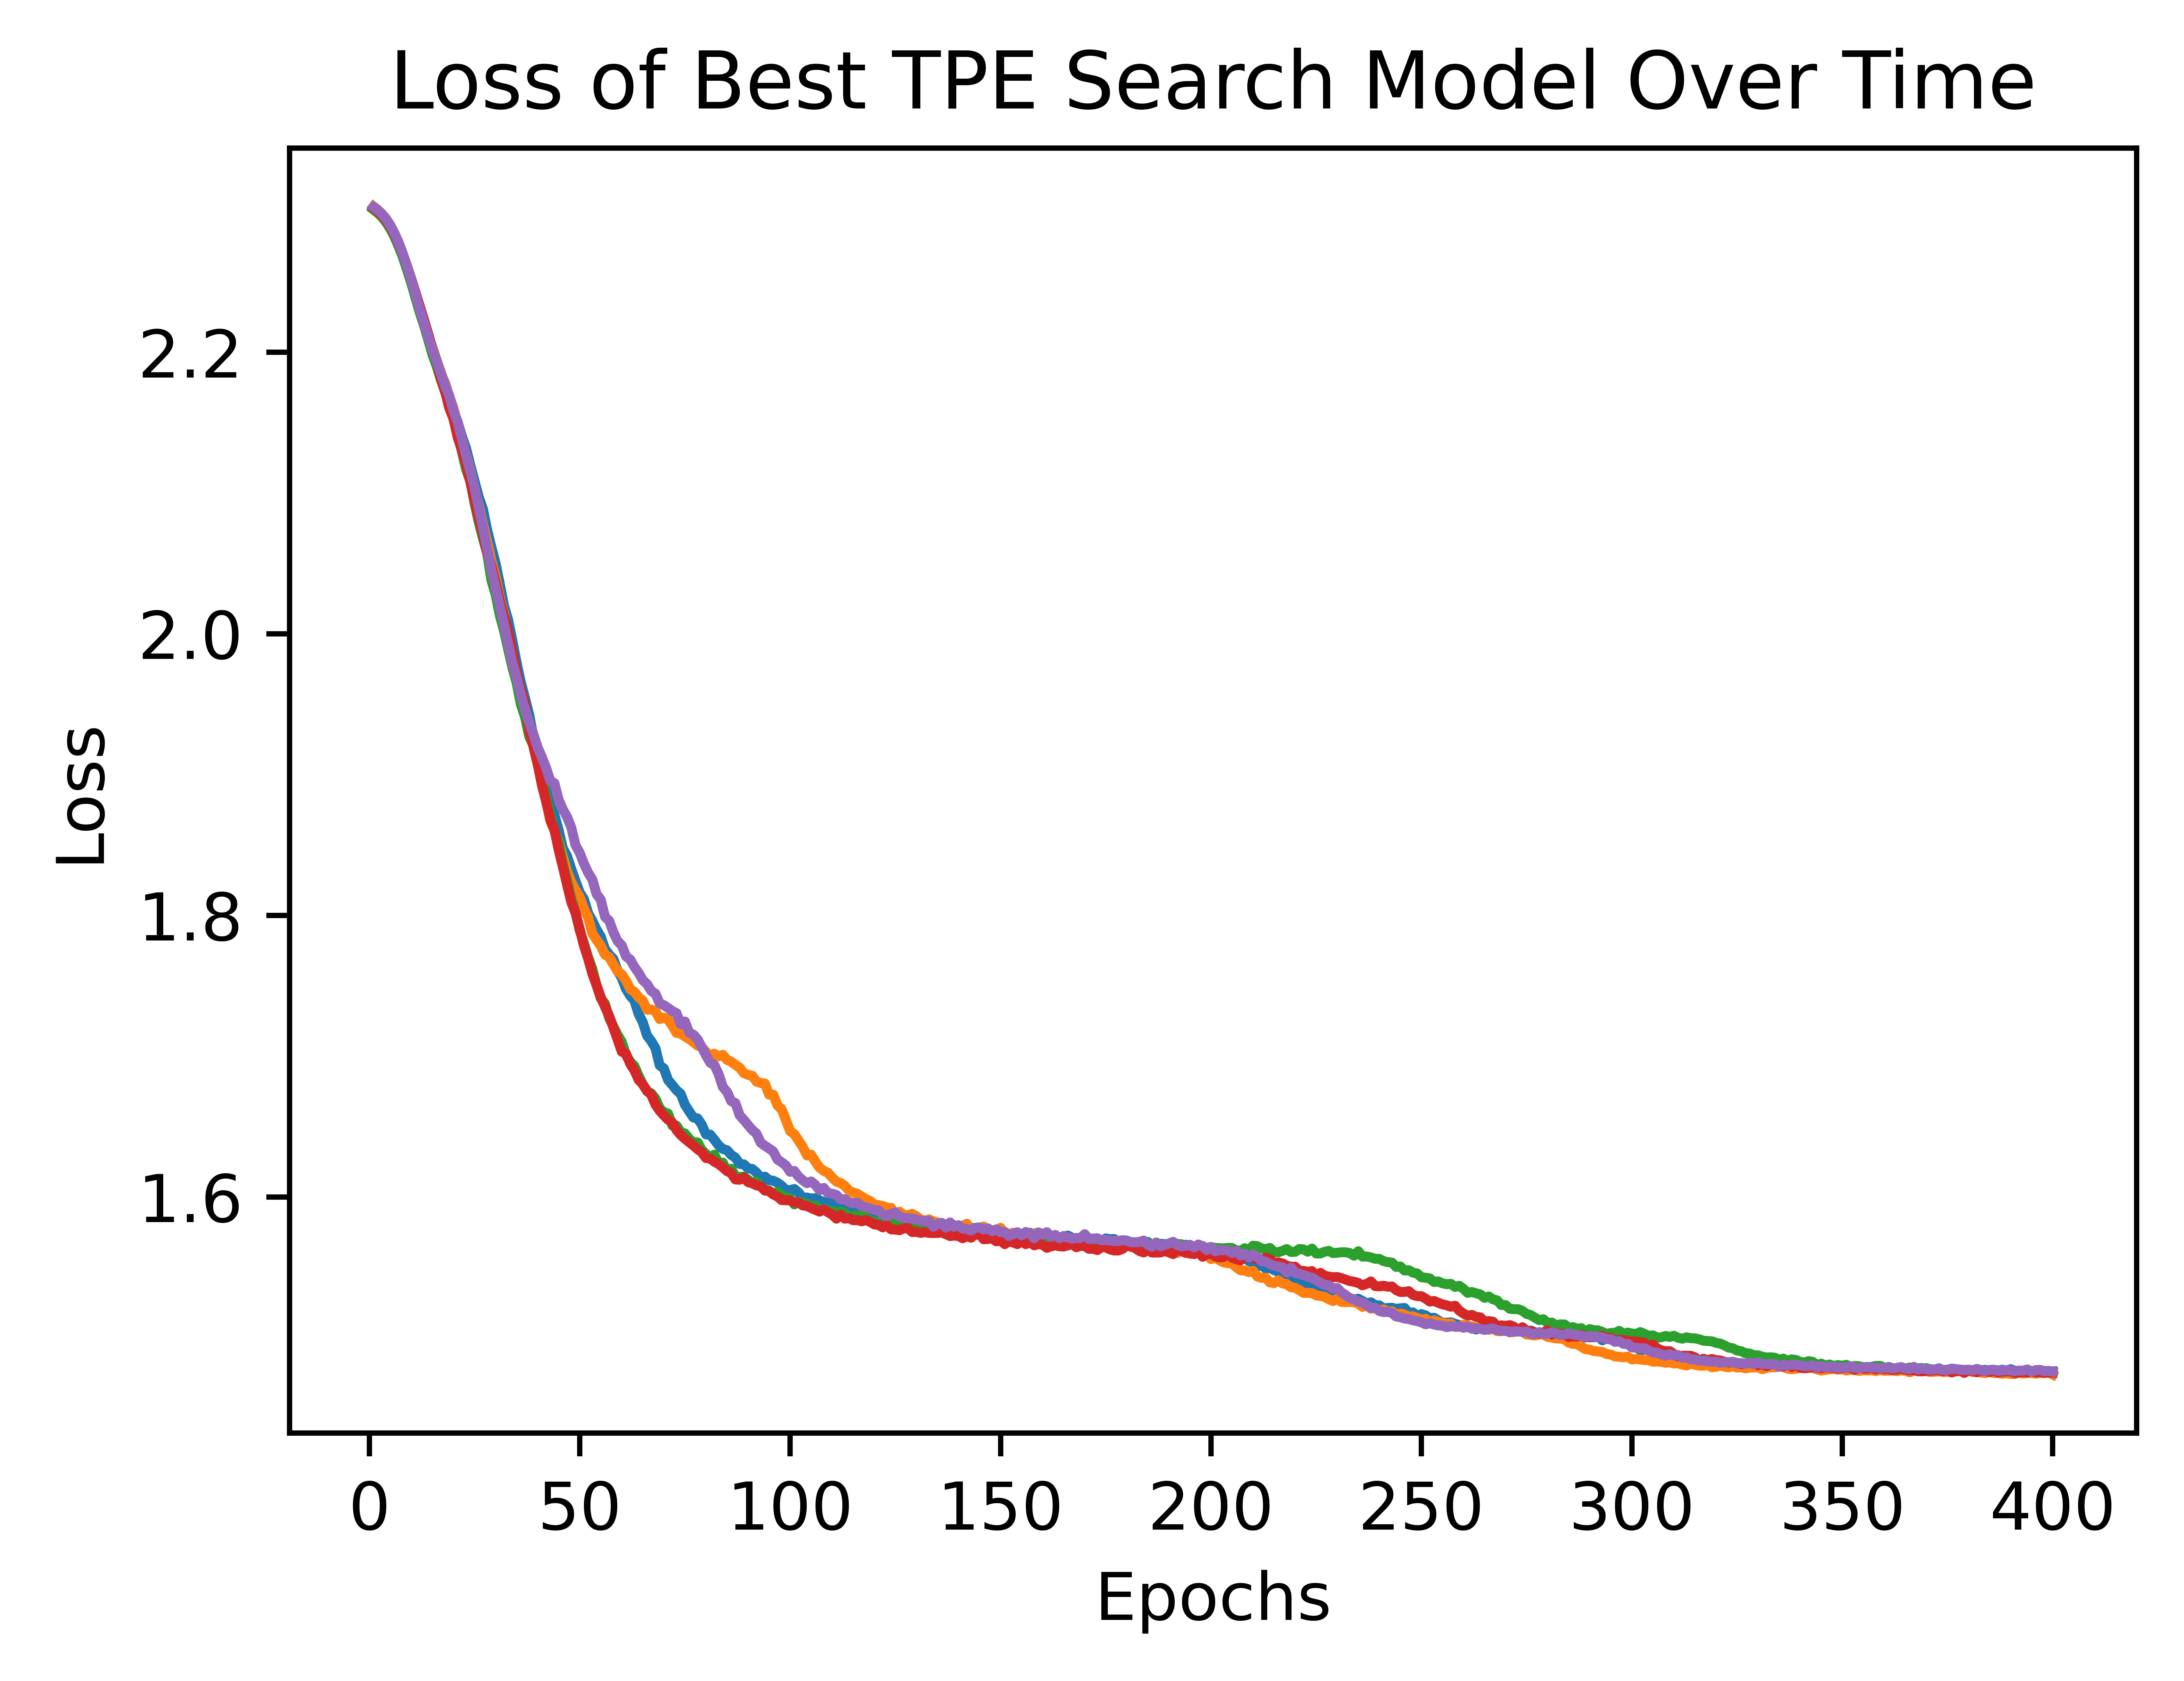

In [96]:
plt.figure(figsize=(5, 3.5), dpi=1600)
for i in range(len(tpe_best['result']['train_losses'])):
    loss_values = tpe_best['result']['train_losses'][i]
    time_steps = range(1, len(loss_values) + 1)
    plt.plot(time_steps, loss_values)

# Set the x-axis label
plt.xlabel('Epochs')
# Set the y-axis label
plt.ylabel('Loss')
# Set the title of the plot
plt.title('Loss of Best TPE Search Model Over Time')

In [7]:
# Getting f1 scores for all models for each search algorithm
rand_f1 = - np.array(rand_trials.losses())
tpe_f1 = - np.array(tpe_trials.losses())

In [14]:
print("Mean random search F1 score: %.2f" % (sum(rand_f1)/len(rand_f1)))
print("Mean TPE search F1 score: %.2f" % (sum(tpe_f1)/len(tpe_f1)))

Mean random search F1 score: 0.39
Mean TPE search F1 score: 0.56


In [18]:
print("Median random search F1 score: %.2f" % np.median(rand_f1))
print("Median tpe search F1 score: %.2f" % np.median(tpe_f1))

Median random search F1 score: 0.48
Median tpe search F1 score: 0.65


(array([64., 10., 14.,  4., 11., 26., 62.,  9.,  0.,  0.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

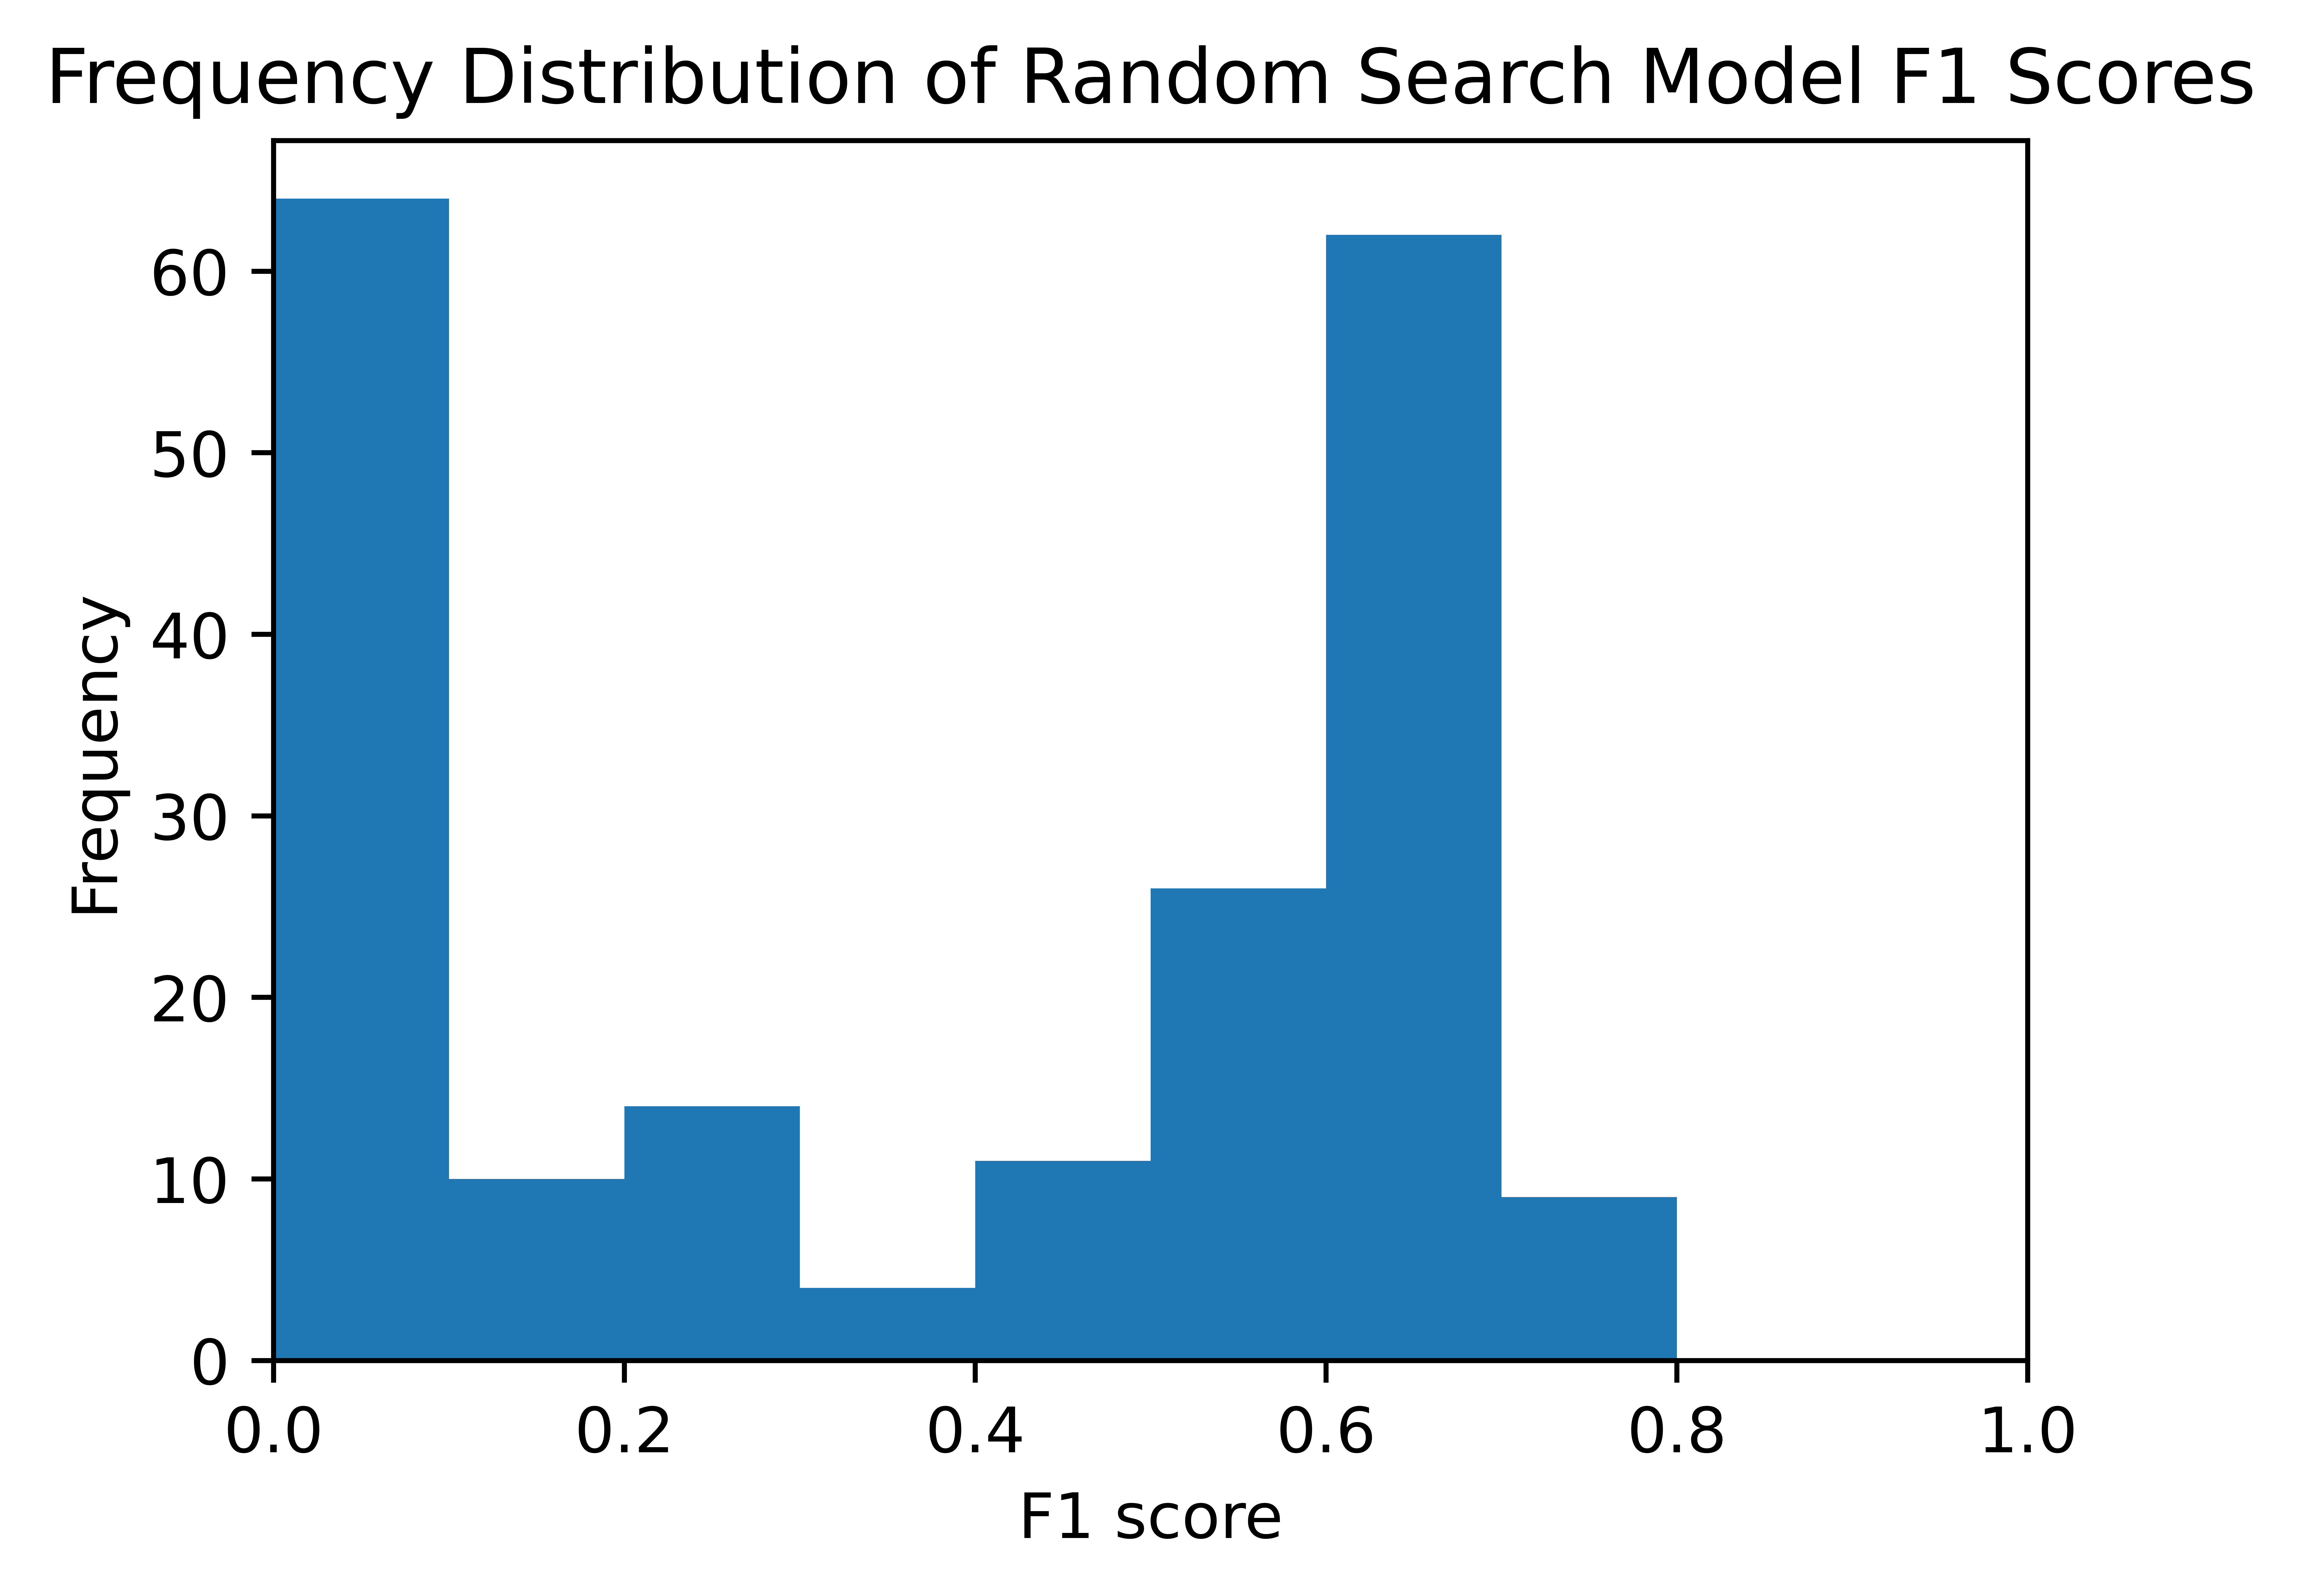

In [97]:
# Making a histogram of the f1 scores for the random search
plt.figure(figsize=(5, 3.5), dpi=1600)
plt.xlabel("F1 score")
plt.ylabel("Frequency")
plt.title("Frequency Distribution of Random Search Model F1 Scores")
plt.xlim(0, 1)
plt.hist(rand_f1 // 0.1 * 0.1, bins=[0.1 * i for i in range(11)])

Text(0.5, 1.0, 'F1 Scores of Random Search Models Over Time')

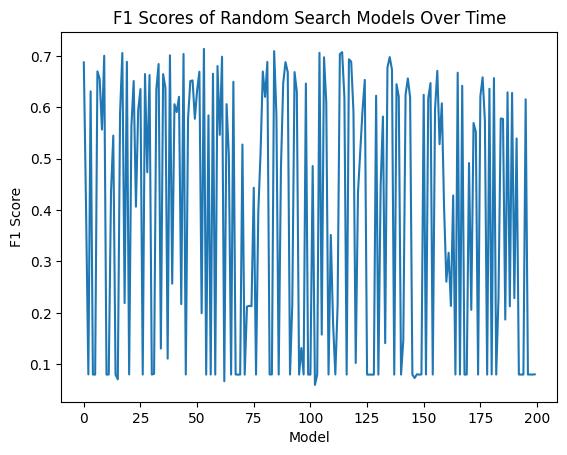

In [69]:
plt.plot(rand_f1)
plt.xlabel("Model")
# Set the y-axis label
plt.ylabel('F1 Score')
# Set the title of the plot
plt.title('F1 Scores of Random Search Models Over Time')

-0.056%


Text(0.5, 1.0, 'F1 Scores of Random Search Models Over Time')

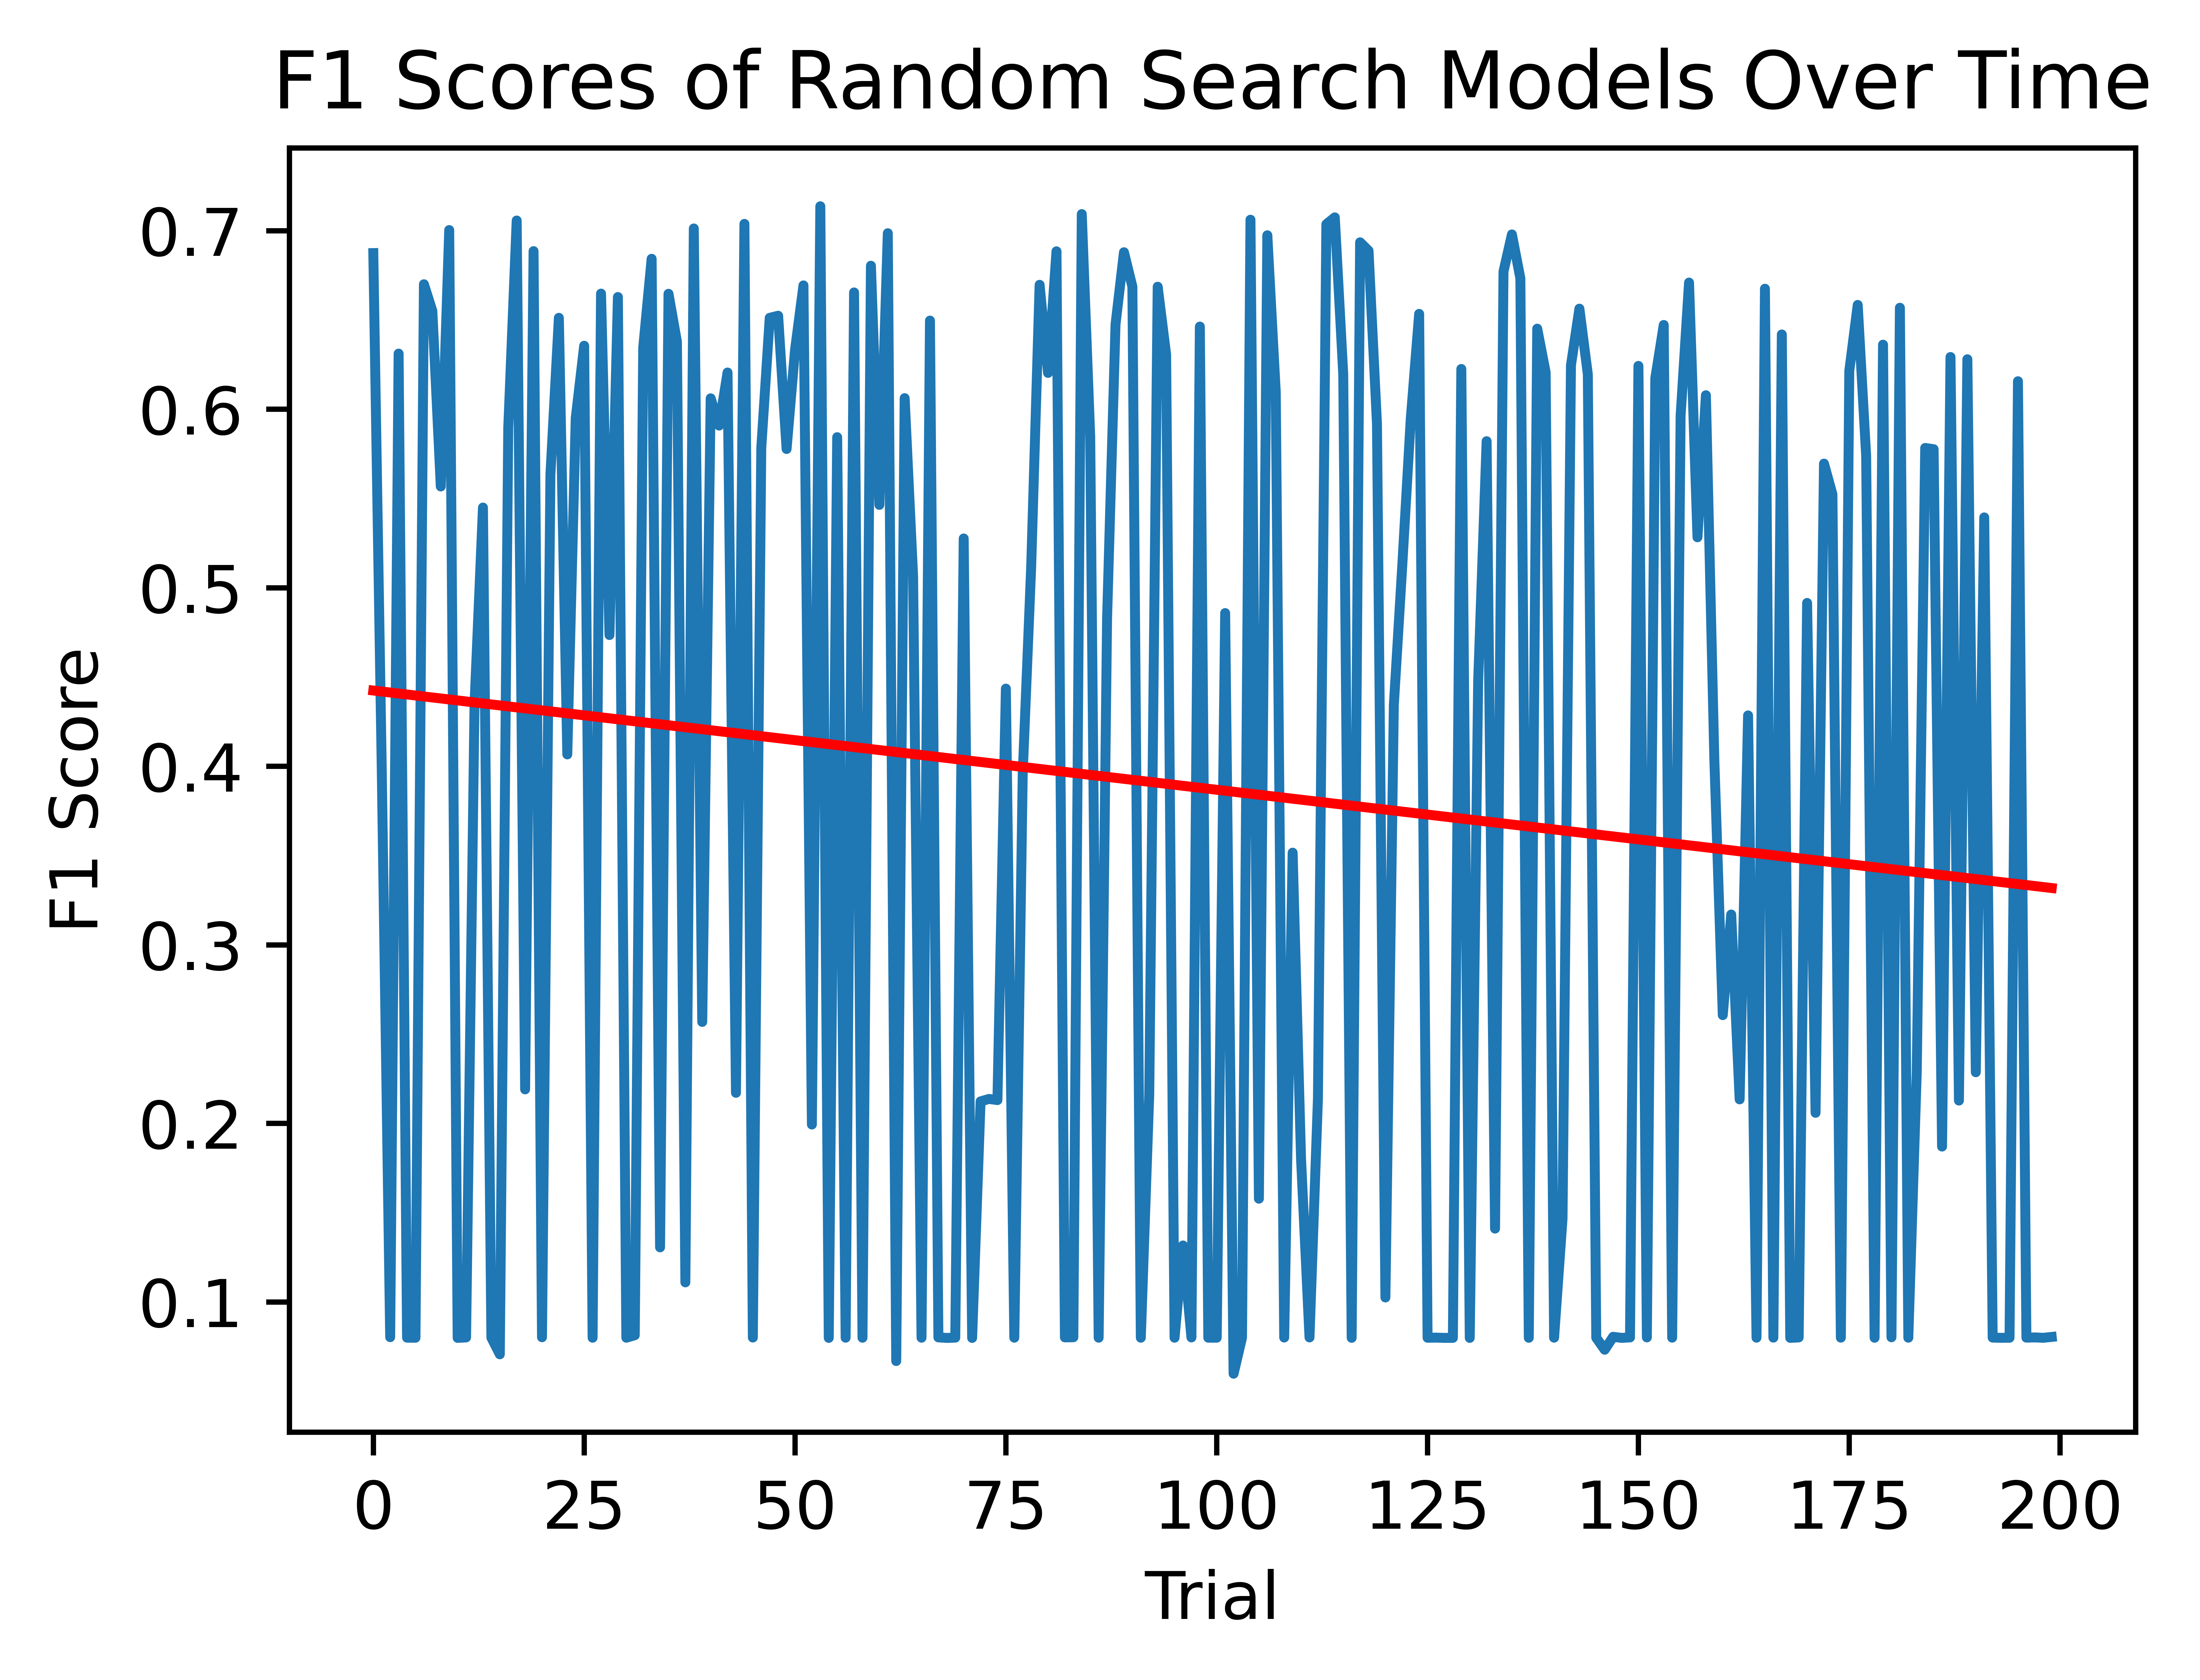

In [163]:
x = np.arange(len(rand_f1)).reshape(-1, 1)
regression = LinearRegression()
regression.fit(x, rand_f1)
print(f'{round(regression.coef_[0] * 100, 3)}%')
# print(regression.intercept_)
# print(np.mean(tpe_f1))
x_regression = np.linspace(min(x), max(x), 100).reshape(-1, 1)
y_regression = regression.predict(x_regression)
plt.figure(figsize=(5, 3.5), dpi=1600)
plt.plot(rand_f1)
plt.xlabel("Trial")
plt.plot(x_regression, y_regression, color='red', label='Regression Line')
plt.ylabel('F1 Score')
plt.title('F1 Scores of Random Search Models Over Time')

In [162]:
X = np.arange(len(rand_f1)).reshape(-1, 1)
y = rand_f1
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     3.143
Date:                Sun, 02 Jul 2023   Prob (F-statistic):             0.0778
Time:                        00:00:19   Log-Likelihood:                -10.283
No. Observations:                 200   AIC:                             24.57
Df Residuals:                     198   BIC:                             31.16
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4425      0.036     12.266      0.0

(array([ 18.,   3.,  10.,   9.,   4.,  13., 102.,  41.,   0.,   0.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

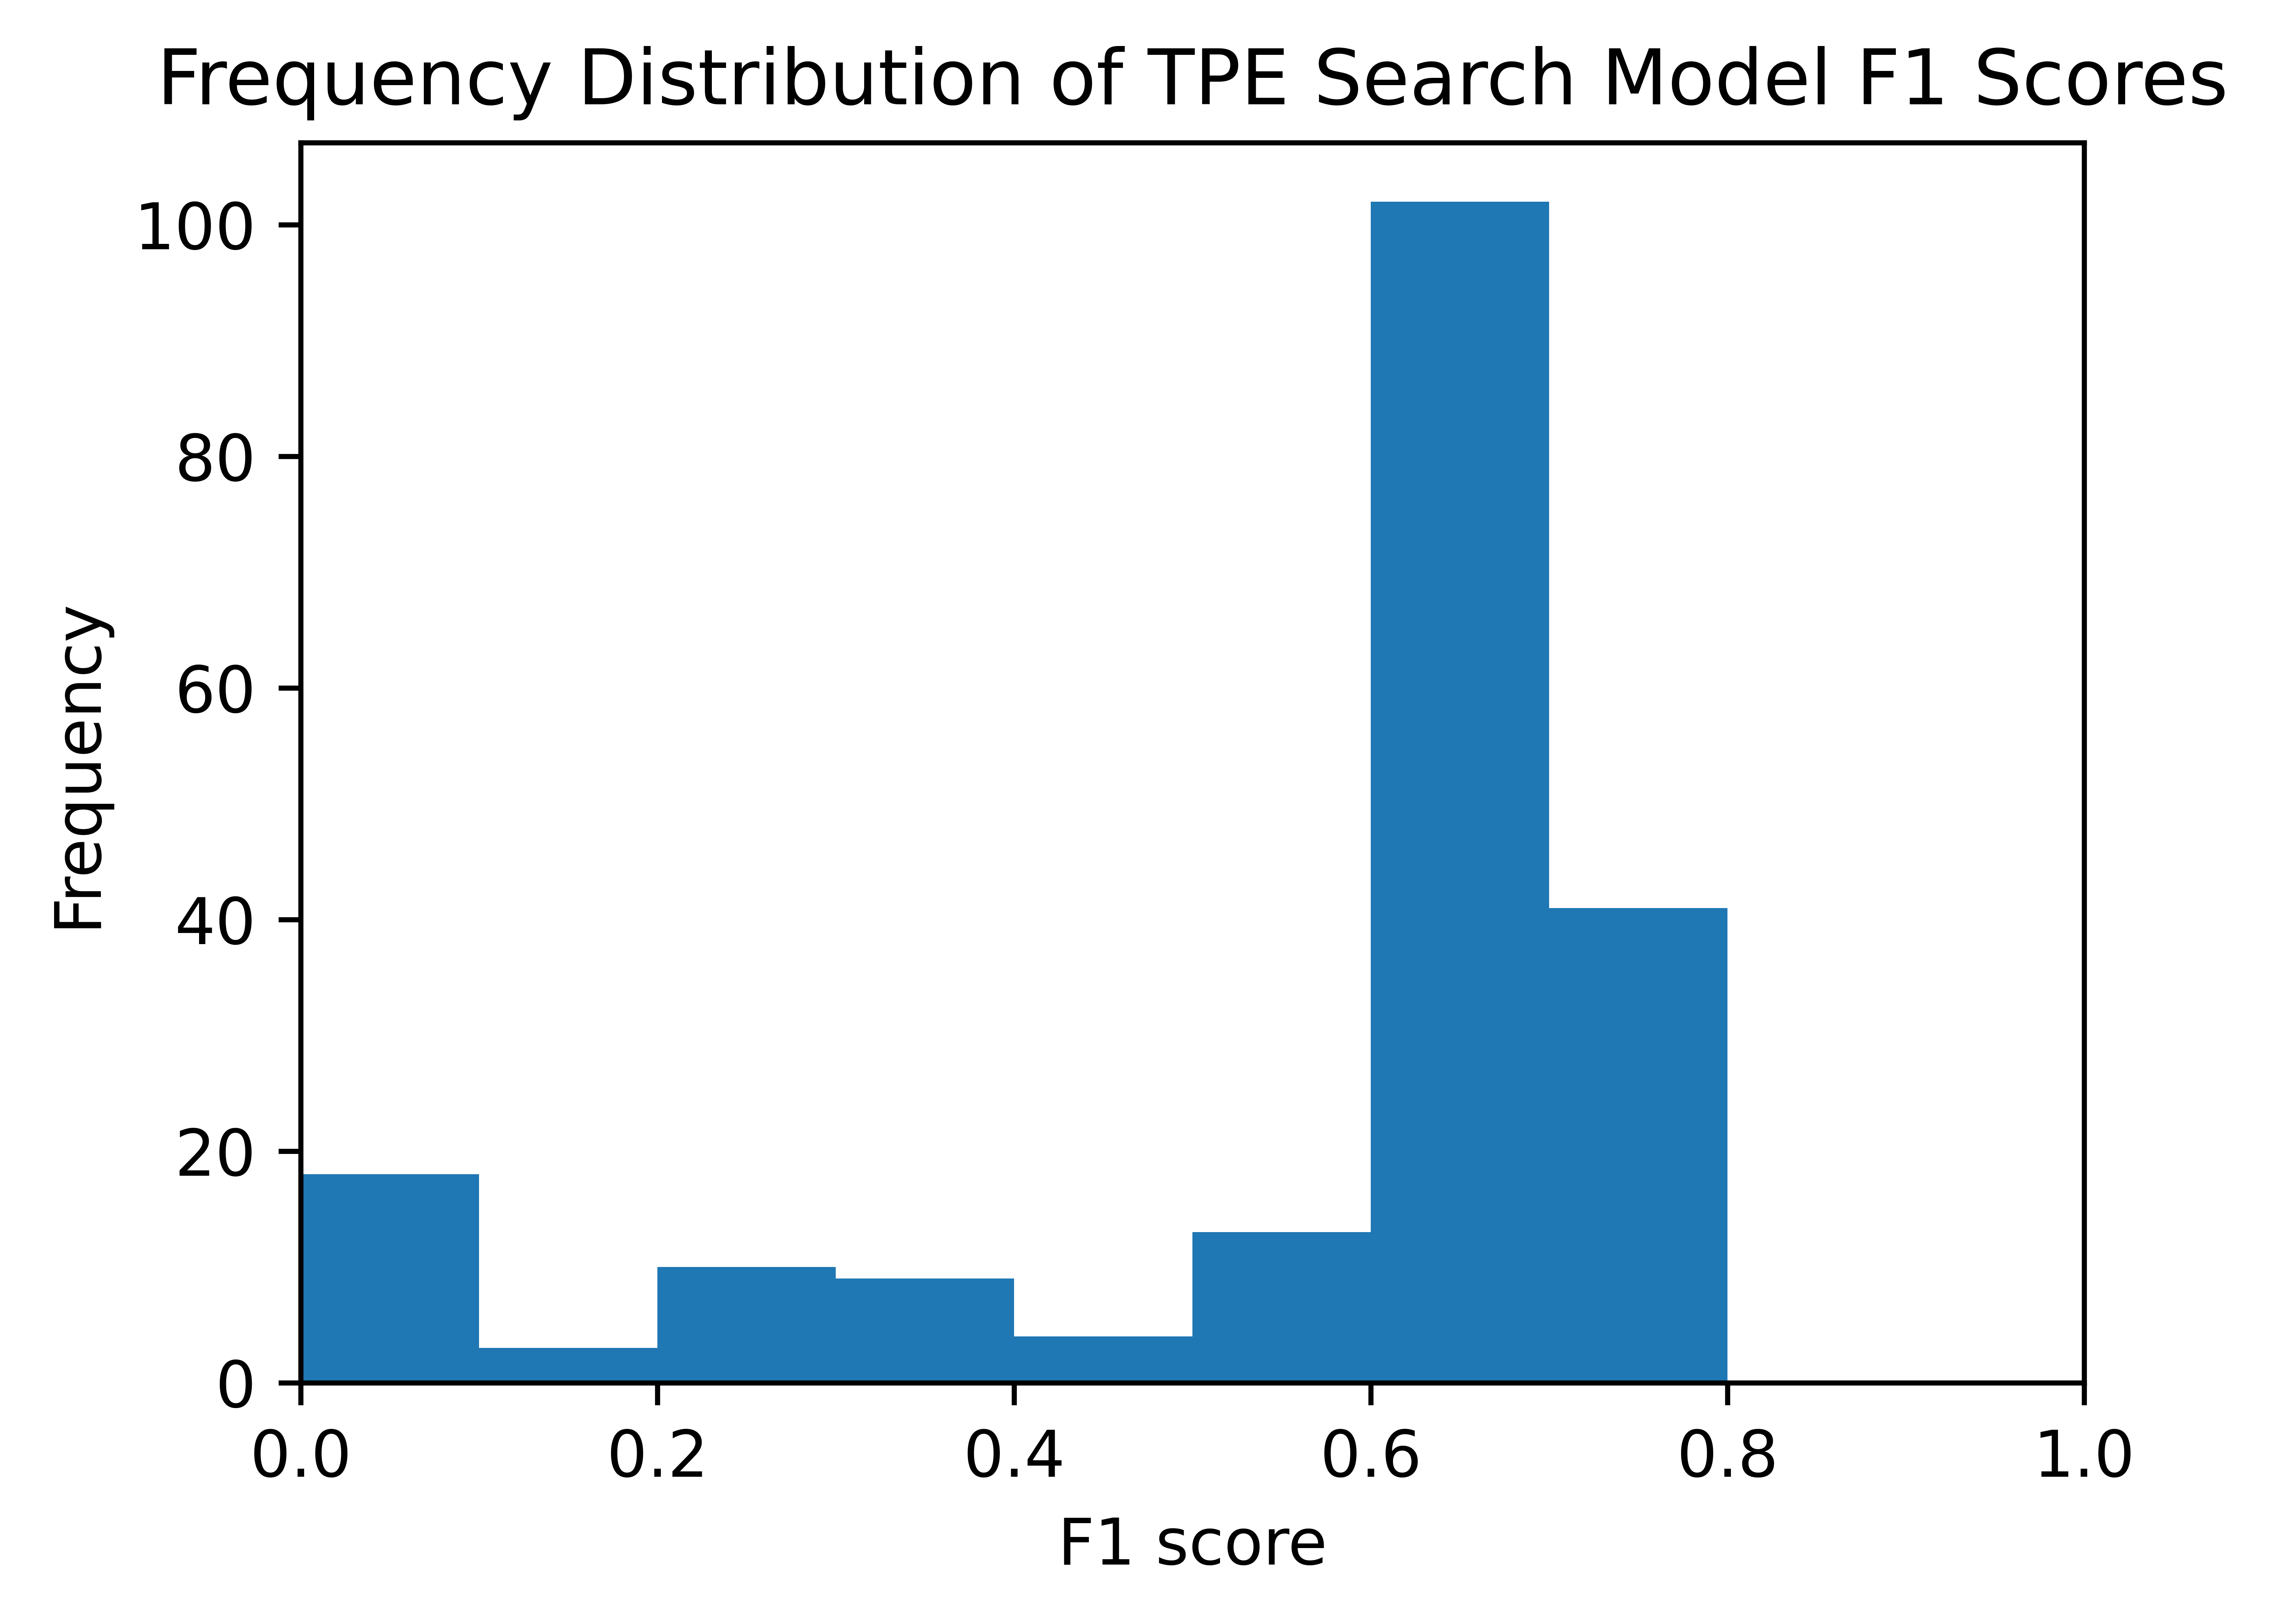

In [100]:
# Making a histogram of the f1 scores for the TPE search
plt.figure(figsize=(5, 3.5), dpi=1200)
plt.xlabel("F1 score")
plt.ylabel("Frequency")
plt.title("Frequency Distribution of TPE Search Model F1 Scores")
plt.xlim(0, 1)
plt.hist(tpe_f1 // 0.1 * 0.1, bins=[0.1 * i for i in range(11)])

In [206]:
x = np.arange(len(rand_f1)).reshape(-1, 1)
regression = LinearRegression()
regression.fit(x, rand_f1)
print(f'{round(regression.coef_[0] * 100, 3)}%')
# print(regression.intercept_)
# print(np.mean(rand_f1))
# x_regression = np.linspace(min(x), max(x), 100).reshape(-1, 1)
# y_regression = regression.predict(x_regression)
# plt.figure(figsize=(5, 3.5), dpi=800)
# plt.scatter(range(len(rand_f1)), rand_f1)
# plt.xlabel("Trial")
# plt.plot(x_regression, y_regression, color='red', label='Regression Line')
# plt.ylabel('F1 Score')
# plt.title('F1 Scores of RS Models Over Time')

-0.056%


In [161]:
X = np.arange(len(tpe_f1)).reshape(-1, 1)
y = tpe_f1
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     8.966
Date:                Sun, 02 Jul 2023   Prob (F-statistic):            0.00310
Time:                        00:00:12   Log-Likelihood:                 41.793
No. Observations:                 200   AIC:                            -79.59
Df Residuals:                     198   BIC:                            -72.99
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4913      0.028     17.670      0.0

Text(0.5, 1.0, 'F1 Scores of TPE Models Over Time')

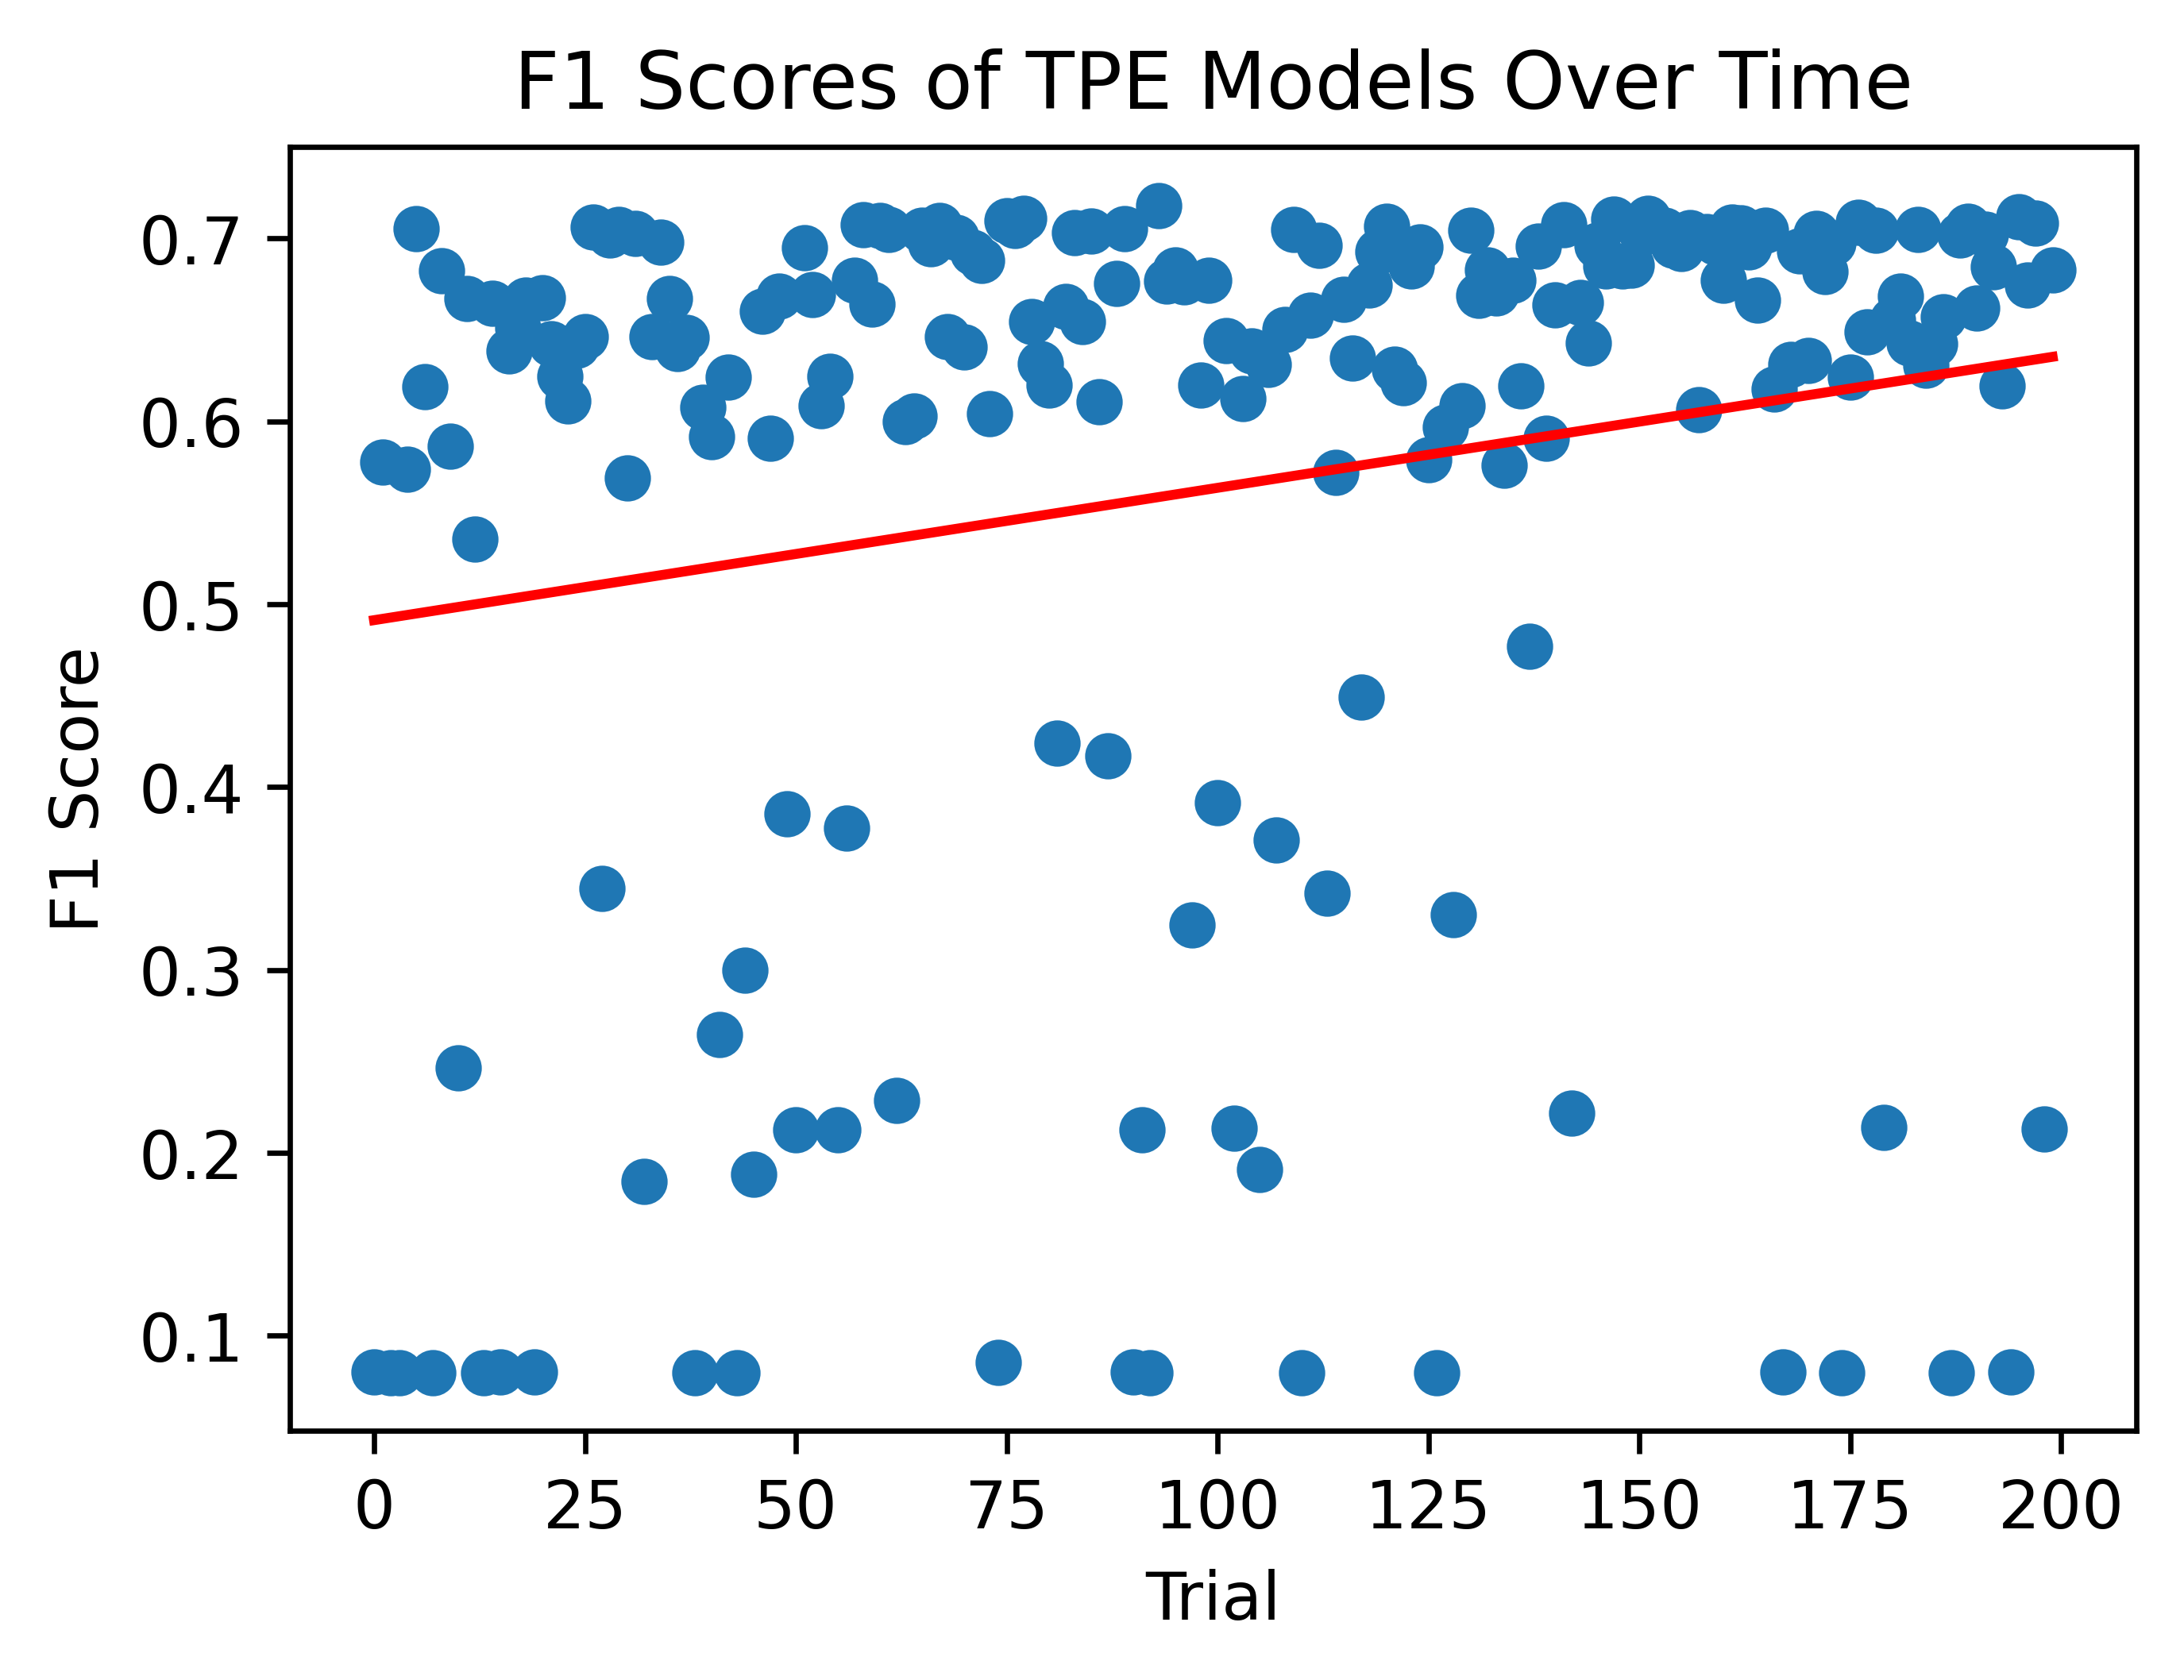

In [205]:
x = np.arange(len(tpe_f1)).reshape(-1, 1)
regression = LinearRegression()
regression.fit(x, tpe_f1)
x_regression = np.linspace(min(x), max(x), 100).reshape(-1, 1)
y_regression = regression.predict(x_regression)
plt.figure(figsize=(5, 3.5), dpi=600)
plt.scatter(range(len(tpe_f1)), tpe_f1)
plt.xlabel("Trial")
plt.plot(x_regression, y_regression, color='red', label='Regression Line')
plt.ylabel('F1 Score')
plt.title('F1 Scores of TPE Models Over Time')

In [37]:
tpe_best_df = pd.read_csv('data/tpe_best_final.csv', header=0)
rand_best_df = pd.read_csv('data/rand_best_final.csv', header=0)

Text(0.5, 1.0, 'Loss of Final Models Over Time')

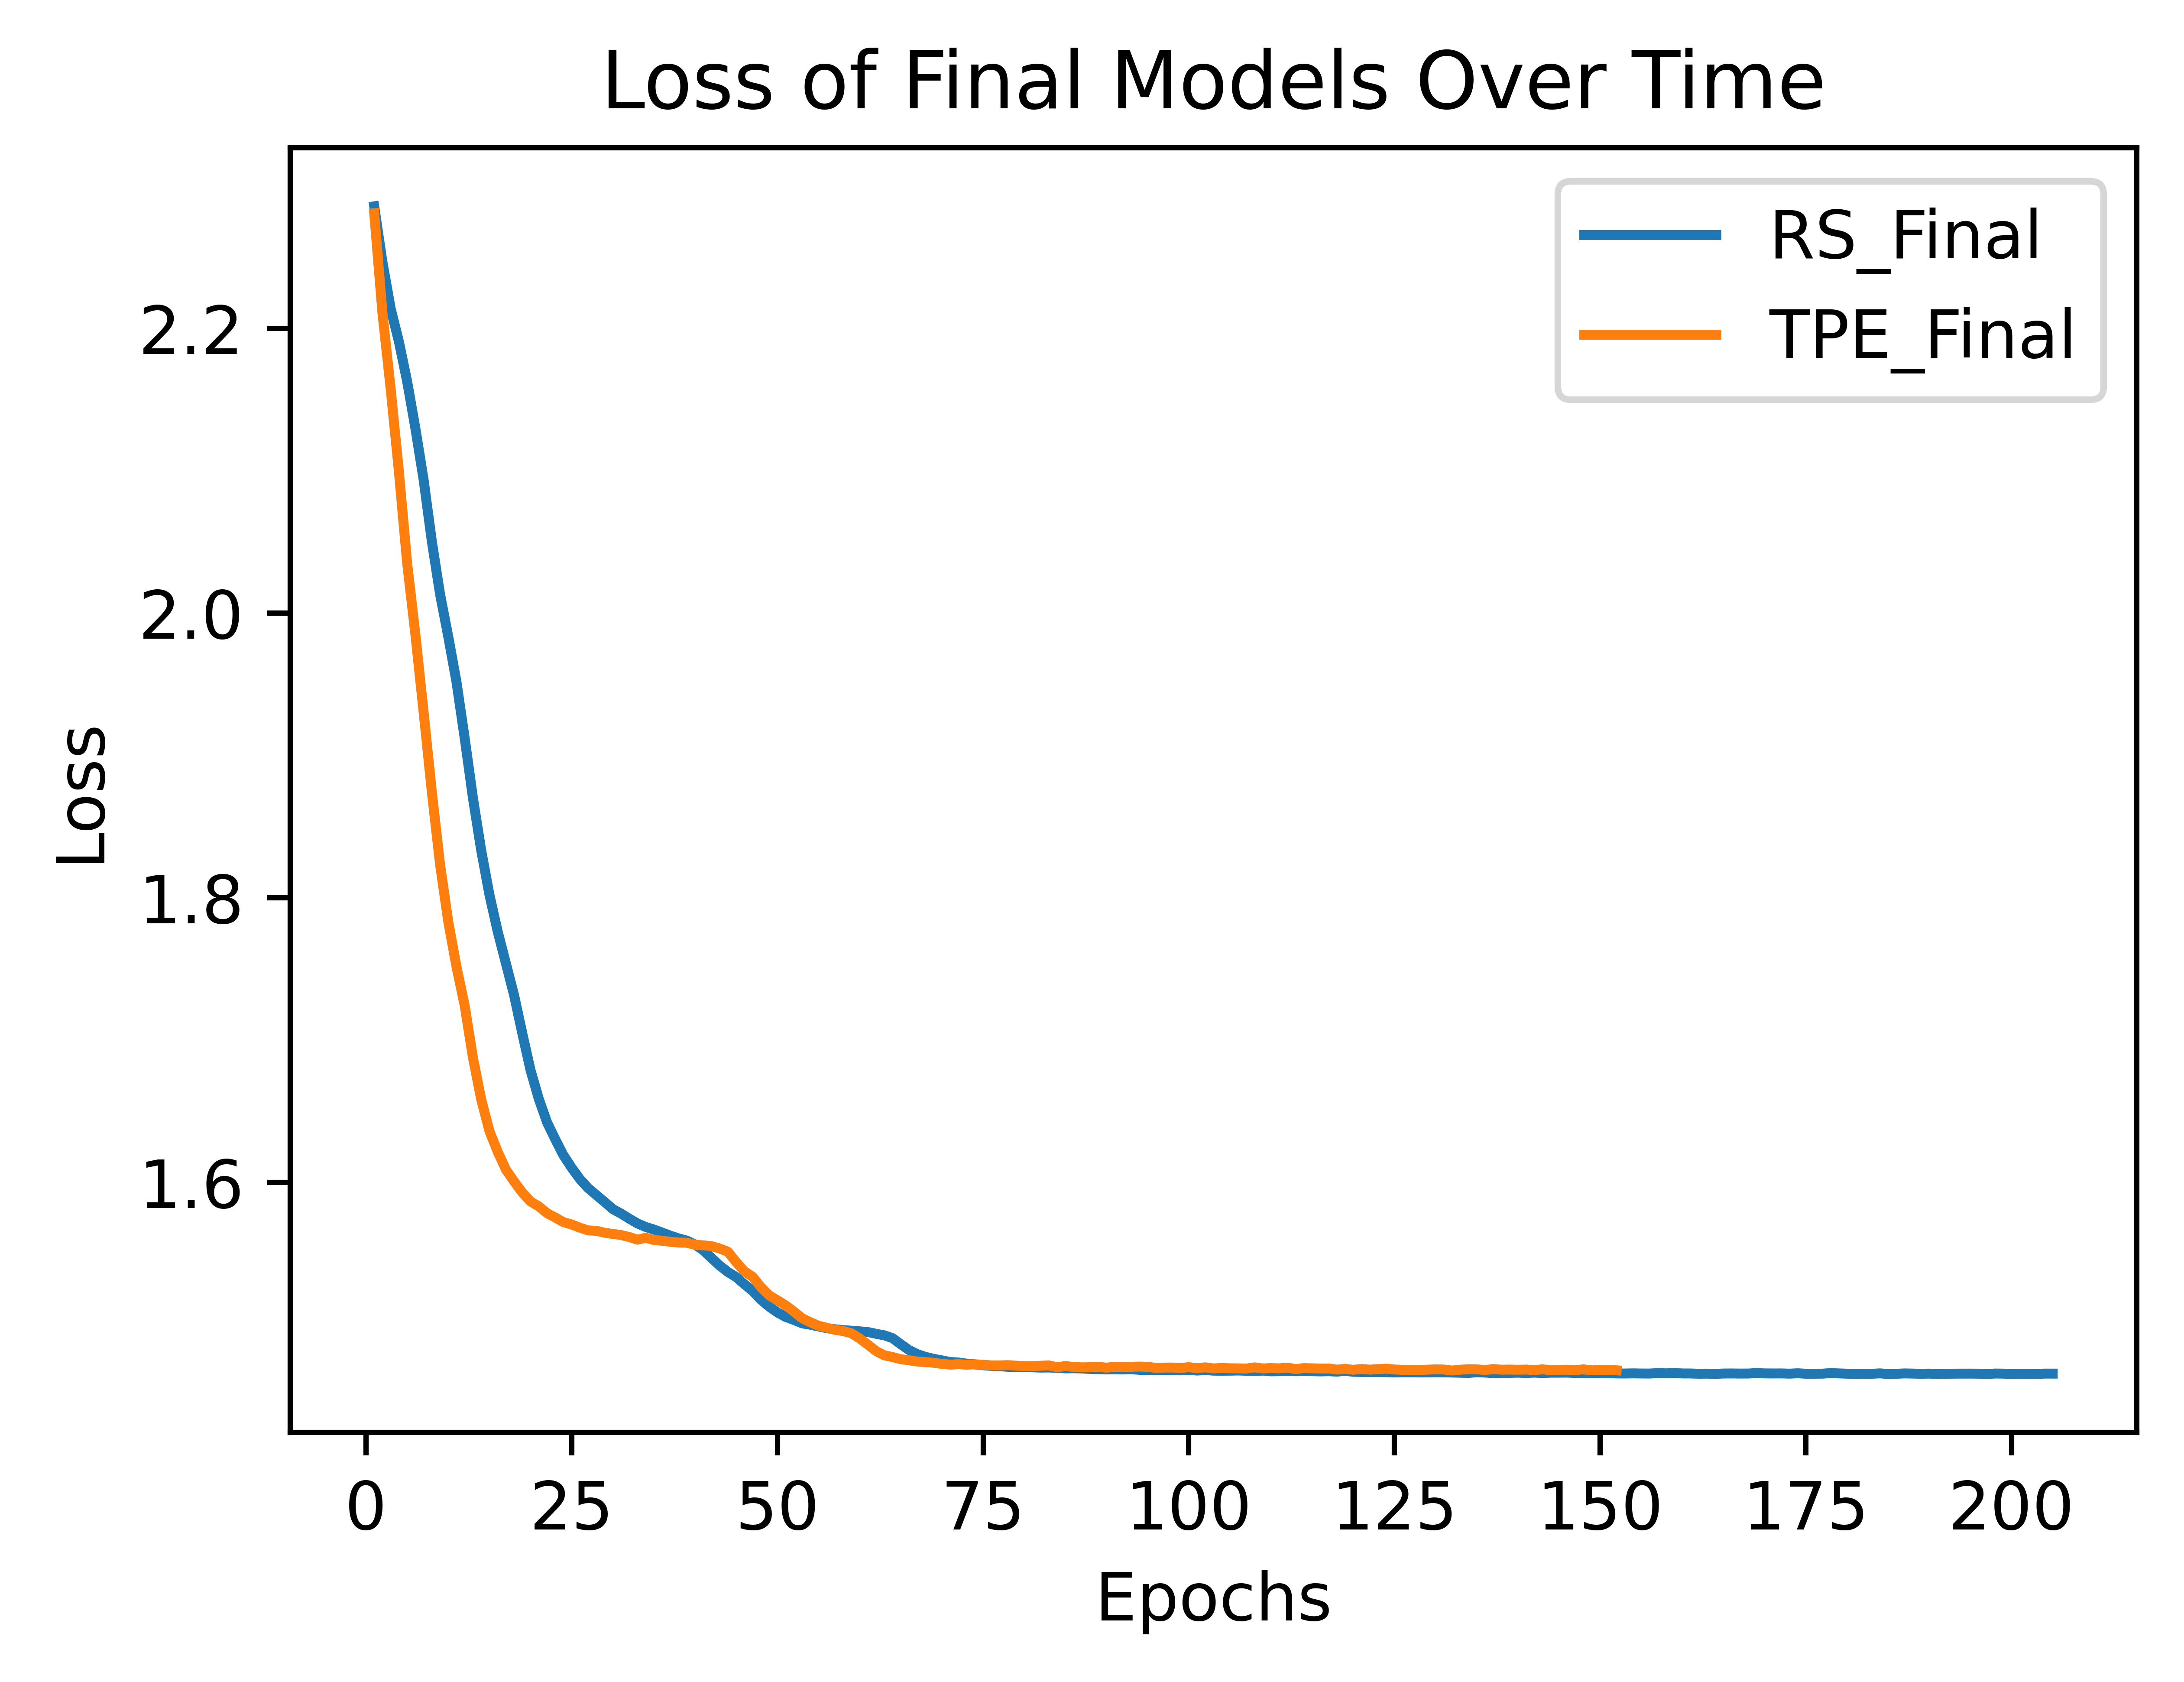

In [165]:
import ast
plt.figure(figsize=(5, 3.5), dpi=1100)
tpe_loss_values = ast.literal_eval(tpe_best_df['train_losses'][0])
rand_loss_values = ast.literal_eval(rand_best_df['train_losses'][0])
tpe_time_steps = range(1, len(tpe_loss_values) + 1)
rand_time_steps = range(1, len(rand_loss_values) + 1)
plt.plot(rand_time_steps, rand_loss_values, label = "RS_Final")
plt.plot(tpe_time_steps, tpe_loss_values, label = "TPE_Final")
plt.legend()
# Set the x-axis label
plt.xlabel('Epochs')
# Set the y-axis label
plt.ylabel('Loss')
# Set the title of the plot
plt.title('Loss of Final Models Over Time')

In [108]:
from sklearn.metrics import confusion_matrix

In [174]:
# Sample data
tpe_data = np.array([[7, 43, 15, 17, 0, 0, 17, 1, 14,  1],
                 [17, 70, 22, 20, 0, 0, 36, 0, 24, 1],
                 [13, 36, 13, 14, 0, 1, 21, 0, 14, 1],
                 [12, 37, 15, 14, 0, 0, 21, 1, 18, 1],
                 [1, 4, 1, 5, 0, 0, 3, 0, 5, 0],
                 [4, 8, 0, 1, 0, 0, 2, 1, 5, 0],
                 [7, 50, 14, 12, 0, 0, 24, 0, 13, 0],
                 [2, 6, 1, 0, 0, 0, 0, 0, 5, 0],
                 [10, 68, 19, 15, 0, 0, 26, 0, 39, 1],
                 [1, 9, 4, 2, 0, 0, 2, 0, 1, 0]])

rand_data = np.array([[7, 56, 7, 18, 0, 0, 13, 2, 12, 0],
                   [12, 92, 15, 22, 0, 0, 30, 1, 17, 1],
                   [7, 57, 8, 13, 1, 0, 19, 0, 7, 1],
                   [10, 49, 11, 14, 0, 0, 21, 1, 13, 0],
                   [1, 5, 1, 5, 0, 0, 2, 0, 5, 0],
                   [4, 11, 0, 2, 0, 0, 1, 0, 3, 0],
                   [7, 66, 7, 13, 0, 0, 19, 0, 8, 0],
                   [2, 9, 0, 0, 0, 0, 0, 0, 3, 0],
                   [11, 90, 10, 16, 0, 0, 23, 0, 27, 1],
                   [1, 11, 3, 2, 0, 0, 1, 0, 1, 0]])

category_to_genre = {'crime': 0,
 'fantasy': 1,
 'history': 2,
 'horror': 3,
 'psychology': 4,
 'romance': 5,
 'science': 6,
 'sports': 7,
 'thriller': 8,
 'travel': 9}

class_labels = [genre for genre in category_to_genre.keys()]

<Figure size 10240x7680 with 0 Axes>

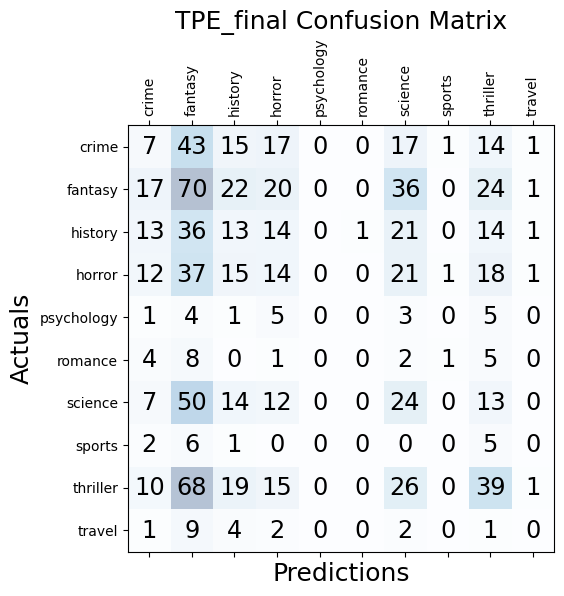

In [175]:
plt.figure(dpi=1600)
fig, ax = plt.subplots(figsize=(5.5, 7.5))
ax.matshow(tpe_data, cmap=plt.cm.Blues, alpha=0.3)
for i in range(tpe_data.shape[0]):
    for j in range(tpe_data.shape[1]):
        ax.text(x=j, y=i,s=tpe_data[i, j], va='center', ha='center', size='xx-large')

classes = np.arange(tpe_data.shape[1])
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=90)
plt.yticks(tick_marks, class_labels)

plt.title('TPE_final Confusion Matrix', fontsize=18)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.show()

<Figure size 10240x7680 with 0 Axes>

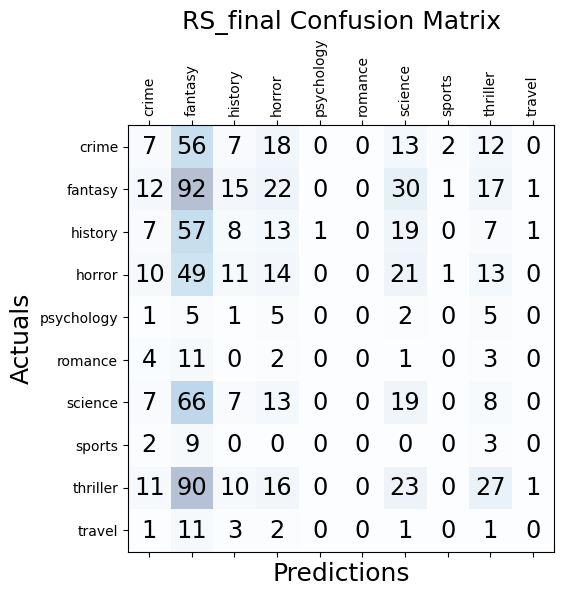

In [176]:
plt.figure(dpi=1600)
fig, ax = plt.subplots(figsize=(5.5, 7.5))
ax.matshow(rand_data, cmap=plt.cm.Blues, alpha=0.3)
for i in range(rand_data.shape[0]):
    for j in range(rand_data.shape[1]):
        ax.text(x=j, y=i,s=rand_data[i, j], va='center', ha='center', size='xx-large')

classes = np.arange(rand_data.shape[1])
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=90)
plt.yticks(tick_marks, class_labels)

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('RS_final Confusion Matrix', fontsize=18)
plt.show()

<Figure size 10240x7680 with 0 Axes>

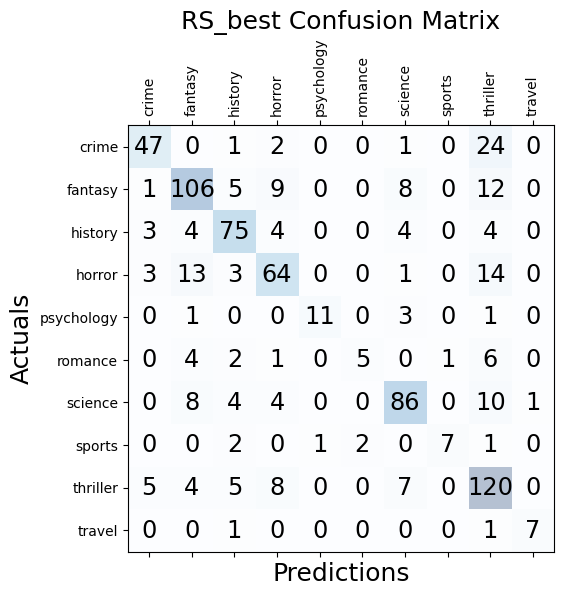

In [177]:
rand_best_search_data = np.array([[ 47,   0,   1,   2,   0,   0,   1,   0,  24,   0],
[  1, 106,   5,   9,   0,   0,   8,   0,  12,   0],
[  3,   4,  75,   4,   0,   0,   4,   0,   4,   0],
[  3,  13,   3,  64,   0,   0,   1,   0,  14,   0],
[  0,   1,   0,   0,  11,   0,   3,   0,   1,   0],
[  0,   4,   2,   1,   0,   5,   0,   1,   6,   0],
[  0,   8,   4,   4,   0,   0,  86,   0,  10,   1],
[  0,   0,   2,   0,   1,   2,   0,   7,   1,   0],
[  5,   4,   5,   8,   0,   0,   7,   0, 120,   0],
[  0,   0,   1,   0,   0,   0,   0,   0,   1,   7]])

plt.figure(dpi=1600)
fig, ax = plt.subplots(figsize=(5.5, 7.5))
ax.matshow(rand_best_search_data, cmap=plt.cm.Blues, alpha=0.3)
for i in range(rand_best_search_data.shape[0]):
    for j in range(rand_best_search_data.shape[1]):
        ax.text(x=j, y=i,s=rand_best_search_data[i, j], va='center', ha='center', size='xx-large')

tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=90)
plt.yticks(tick_marks, class_labels)

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('RS_best Confusion Matrix', fontsize=18)
plt.show()

<Figure size 10240x7680 with 0 Axes>

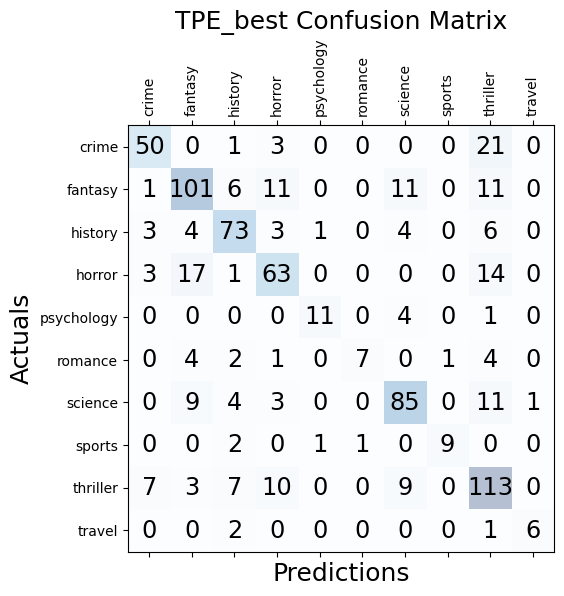

In [178]:
tpe_best_search_data = np.array([[ 50,   0,   1,   3,   0,   0,   0,   0,  21,   0],
          [  1, 101,   6,  11,   0,   0,  11,   0,  11,   0],
          [  3,   4,  73,   3,   1,   0,   4,   0,   6,   0],
          [  3,  17,   1,  63,   0,   0,   0,   0,  14,   0],
          [  0,   0,   0,   0,  11,   0,   4,   0,   1,   0],
          [  0,   4,   2,   1,   0,   7,   0,   1,   4,   0],
          [  0,   9,   4,   3,   0,   0,  85,   0,  11,   1],
          [  0,   0,   2,   0,   1,   1,   0,   9,   0,   0],
          [  7,   3,   7,  10,   0,   0,   9,   0, 113,   0],
          [  0,   0,   2,   0,   0,   0,   0,   0,   1,   6]])

plt.figure(dpi=1600)
fig, ax = plt.subplots(figsize=(5.5, 7.5))
ax.matshow(tpe_best_search_data, cmap=plt.cm.Blues, alpha=0.3)
for i in range(tpe_best_search_data.shape[0]):
    for j in range(tpe_best_search_data.shape[1]):
        ax.text(x=j, y=i,s=tpe_best_search_data[i, j], va='center', ha='center', size='xx-large')

tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=90)
plt.yticks(tick_marks, class_labels)

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('TPE_best Confusion Matrix', fontsize=18)
plt.show()

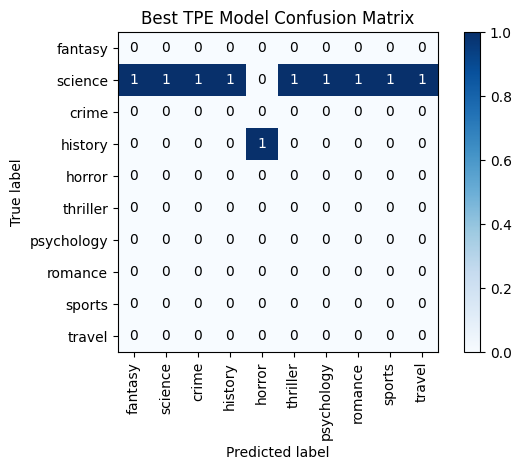

In [129]:
# Calculate confusion matrix
cm = confusion_matrix(tpe_data.argmax(axis=1), np.arange(tpe_data.shape[1]))

# Plot the confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Best TPE Model Confusion Matrix')
plt.colorbar()

# Add labels to the plot
classes = np.arange(tpe_data.shape[1])
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=90)
plt.yticks(tick_marks, class_labels)

# Add text annotations
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'), ha='center', va='center',
                 color='white' if cm[i, j] > thresh else 'black')

# Set axis labels
plt.ylabel('True label')
plt.xlabel('Predicted label')

# Show the plot
plt.tight_layout()
plt.show()